In [13]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial

AUTO = tf.data.experimental.AUTOTUNE
import warnings
warnings.filterwarnings('ignore')


In [14]:
images = glob('train_cancer/*/*.jpg')
len(images)

270

In [15]:
#replace backslash with forward slash to avoid unexpected errors
images = [path.replace('\\', '/') for path in images]
print(images)
df = pd.DataFrame({'filepath': images})
df['label'] = df['filepath'].str.split('/', expand=True)[1] 
df.head()

['train_cancer/benign/12.jpg', 'train_cancer/benign/13.jpg', 'train_cancer/benign/14.jpg', 'train_cancer/benign/17.jpg', 'train_cancer/benign/19.jpg', 'train_cancer/benign/20.jpg', 'train_cancer/benign/21.jpg', 'train_cancer/benign/22.jpg', 'train_cancer/benign/23.jpg', 'train_cancer/benign/24.jpg', 'train_cancer/benign/25.jpg', 'train_cancer/benign/26.jpg', 'train_cancer/benign/27.jpg', 'train_cancer/benign/28.jpg', 'train_cancer/benign/29.jpg', 'train_cancer/benign/3.jpg', 'train_cancer/benign/30.jpg', 'train_cancer/benign/32.jpg', 'train_cancer/benign/33.jpg', 'train_cancer/benign/34.jpg', 'train_cancer/benign/35.jpg', 'train_cancer/benign/36.jpg', 'train_cancer/benign/38.jpg', 'train_cancer/benign/39.jpg', 'train_cancer/benign/4.jpg', 'train_cancer/benign/40.jpg', 'train_cancer/benign/41.jpg', 'train_cancer/benign/42.jpg', 'train_cancer/benign/6.jpg', 'train_cancer/benign/7.jpg', 'train_cancer/malignant/10.jpg', 'train_cancer/malignant/100.jpg', 'train_cancer/malignant/101.jpg', 't

,filepath,label
0,train_cancer/benign/12.jpg,benign
1,train_cancer/benign/13.jpg,benign
2,train_cancer/benign/14.jpg,benign
3,train_cancer/benign/17.jpg,benign
4,train_cancer/benign/19.jpg,benign


In [16]:
df['label_bin'] = np.where(df['label'].values == 'malignant', 1, 0)
print(df.head())

                     filepath   label  label_bin
0  train_cancer/benign/12.jpg  benign          0
1  train_cancer/benign/13.jpg  benign          0
2  train_cancer/benign/14.jpg  benign          0
3  train_cancer/benign/17.jpg  benign          0
4  train_cancer/benign/19.jpg  benign          0


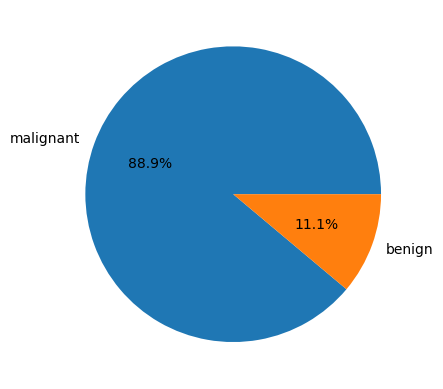

In [17]:
x = df['label'].value_counts() 
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%') 
plt.show()

In [18]:
features = df['filepath']
target = df['label_bin']
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42) 

benign
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
      dtype='int64')


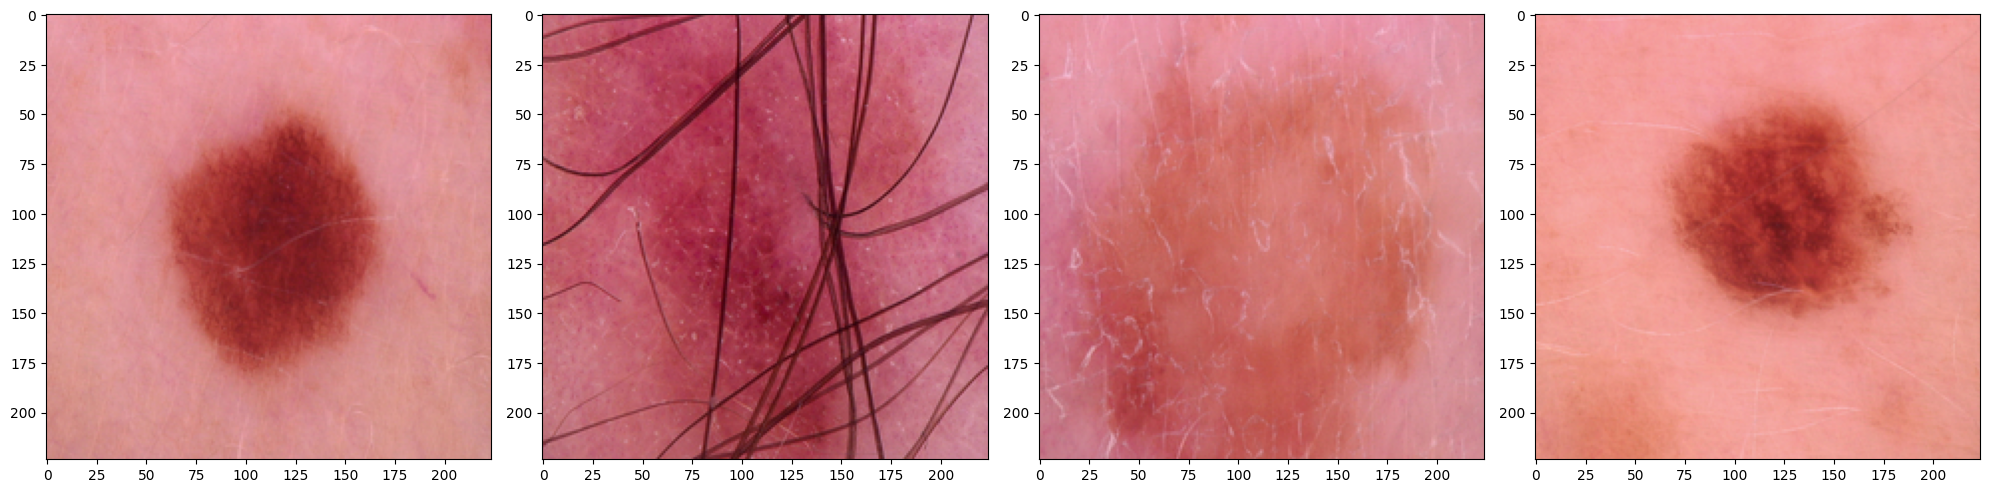

malignant
Index([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
       ...
       260, 261, 262, 263, 264, 265, 266, 267, 268, 269],
      dtype='int64', length=240)


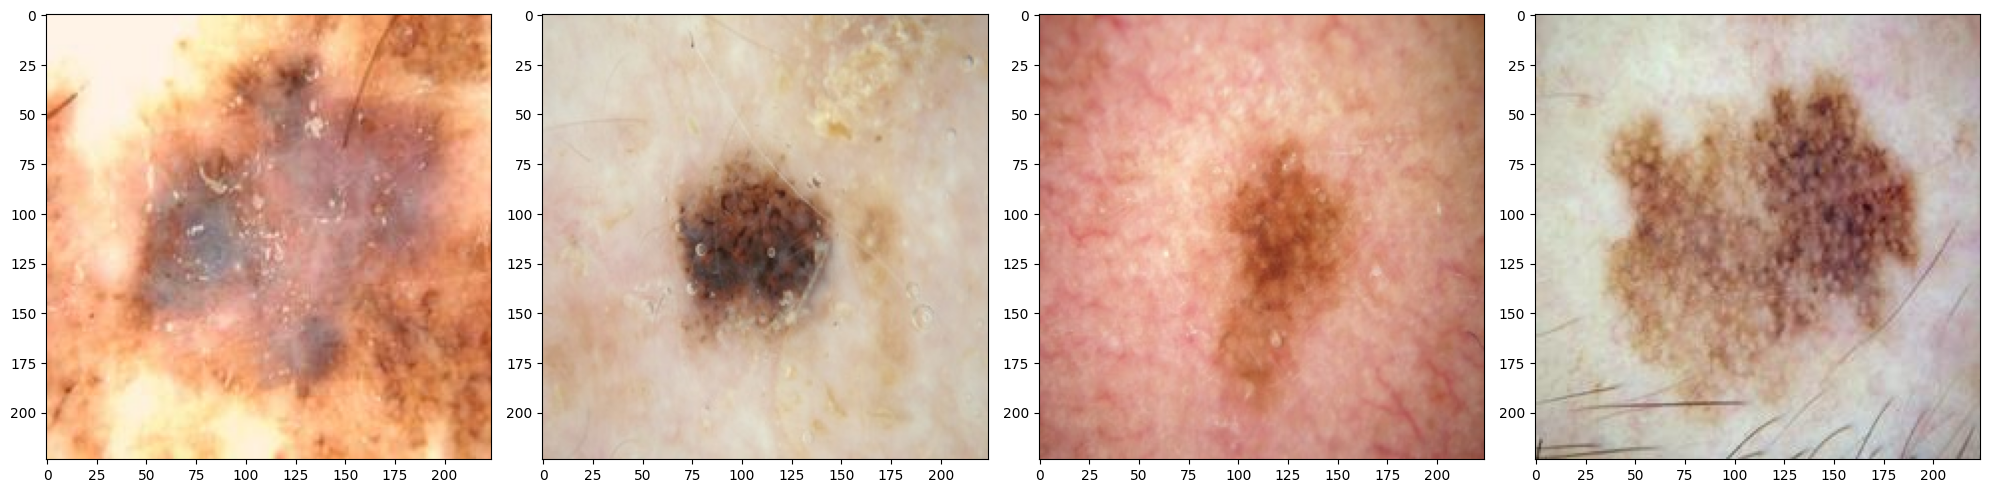

In [25]:
for cat in df['label'].unique():
    print(cat)
    temp = df[df['label'] == cat]
    index_list = temp.index
    print(index_list)
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    for i in range(4):
        index = np.random.randint(0, len(index_list))
        index = index_list[index]
        data = df.iloc[index]
        image_path = data[0]
        img = np.array(Image.open(image_path))
        ax[i].imshow(img)

    plt.tight_layout()
    plt.show()


In [20]:
import cv2
import numpy as np
def load_and_process_image(filepath):
    img = cv2.imread(filepath)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalize to [0, 1]
    return img.flatten()  
load_and_process_image('train_cancer/benign/12.jpg')


array([0.03137255, 0.05098039, 0.10980392, ..., 0.00392157, 0.01176471,
       0.08235294])

In [21]:
X_train_processed = np.array([load_and_process_image(filepath) for filepath in X_train])
X_test_processed = np.array([load_and_process_image(filepath) for filepath in X_test]) 
print(X_train_processed) 

[[0.5372549  0.58431373 0.74901961 ... 0.49803922 0.52156863 0.70588235]
 [0.49411765 0.6        0.70196078 ... 0.50980392 0.60784314 0.68627451]
 [0.58431373 0.63921569 0.63137255 ... 0.70196078 0.69803922 0.65882353]
 ...
 [0.5372549  0.68235294 0.69803922 ... 0.4745098  0.58823529 0.61568627]
 [0.35294118 0.41568627 0.56078431 ... 0.42745098 0.42745098 0.58431373]
 [0.28627451 0.43137255 0.65098039 ... 0.3254902  0.48235294 0.69019608]]


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3) 
knn_classifier.fit(X_train_processed, Y_train)         


KNeighborsClassifier(n_neighbors=3)

In [24]:
ImageForPrediction = load_and_process_image('Testing2.jfif')
print(ImageForPrediction) 
predictions = knn_classifier.predict([ImageForPrediction])
print(predictions)
if predictions[0] == 1:
    print("The image is predicted to have cancer.")
else:
    print("The image is predicted to be cancer-free.") 

[0.29019608 0.29803922 0.29803922 ... 0.48627451 0.54117647 0.65098039]
[1]
The image is predicted to have cancer.
